In [8]:
import os
import sys
import argparse
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [9]:
def get_nrow(path):
    df = pd.read_csv(path + '/rewards.log', dtype='float')
    return len(df)

In [10]:
def draw_reward(path):
    df = pd.read_csv(path + '/rewards.log', dtype='float')
    ndf = pd.DataFrame(columns=['episode', 'reward'])

    for i in range(len(df) // 100):
        ndf = ndf.append(pd.DataFrame({
            'episode': [(i + 1) * 100],
            'reward': [df[i * 100:(i + 1) * 100].mean()[1]]
        }))

    sns.set()
    plt.figure()
    ndf.plot(x='episode', y='reward')
    plt.ylim([0, 200])
    plt.show()

In [17]:
def draw_heatmap(path, nrow, agent_num=6, height=20, width=20, split_ep=10000, per_row=3):
    for i in range(nrow // split_ep):
        print("Episode {:d} ~ {:d}".format(i * split_ep + 1, (i + 1) * split_ep))
        heatmap = np.zeros((agent_num, height, width))
        for j in range(0, split_ep, 50):
            e = i * split_ep + j
            fn = path + "/record/episode{:06d}/task.log".format(e)
            task = np.loadtxt(fn, delimiter=",", usecols=(1, 2, 3), dtype=np.int16)
            for t in task:
                aid, y, x = t
                if aid == -1:
                    continue
                heatmap[aid, y, x] += 1

        fig, ax = plt.subplots((agent_num + per_row - 1) // per_row, per_row, sharex=True, sharey=True)
        cbar_ax = fig.add_axes([0.91, .3, .03, .4])
        cbar_ax.tick_params(labelsize=8)
        for j, ax in enumerate(ax.flat):
            sns.heatmap(heatmap[j], ax=ax, cmap='Blues', square=True,
                        cbar=j == 0,
                        vmin=0, vmax=50,
                        cbar_ax=None if j else cbar_ax)
            ax.tick_params(labelsize=8)
        plt.tight_layout(rect=[0, 0, .9, 1])
        plt.show()

<Figure size 432x288 with 0 Axes>

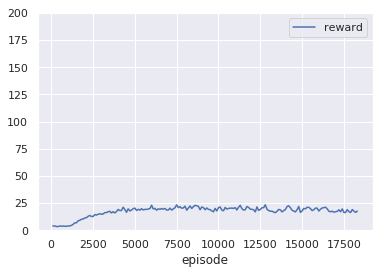

In [20]:
path = '../marl/outputs/mv_simple_20181129_112542/'
nrow = get_nrow(path)
draw_reward(path)

In [16]:
draw_heatmap(path, nrow)

Episode 1 ~ 10000


TypeError: 'numpy.int16' object is not iterable